In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-02-24 14:54:25.441449: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 14:54:25.482097: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 14:54:25.482125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 14:54:25.483190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-24 14:54:25.488845: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-24 14:54:25.489378: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

In [3]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import classification_report


In [31]:
X_new = pd.read_csv('X_val_nulti_with_ping.csv')
y_new = pd.read_csv('y_val_multi_with_ping.csv')

In [32]:
y1 = y_new
le = LabelEncoder()
y_new = le.fit_transform(y_new)

/home/iskadoodle/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Print the mapping of labels to digits
print("Label to digit mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

Label to digit mapping:
DdoS: 0
Normal: 1
Probe: 2


In [34]:
X_new_reshaped = X_new.values.reshape((X_new.shape[0], 1, X_new.shape[1]))


In [35]:
model = load_model("micMultiBB1/")

In [36]:
predictions = model.predict(X_new_reshaped)

455/455 [==============================] - 1s 2ms/step


In [37]:
#convert to categorical
y_new = to_categorical(y_new,3)

In [38]:
comparison = np.argmax(predictions,axis=1) == np.argmax(y_new,axis=1)

In [39]:
accuracy = accuracy_score(np.argmax(y_new,axis=1), np.argmax(predictions,axis=1))
print("accuracy on the new dataset: {:.2f}%".format(accuracy*100))

accuracy on the new dataset: 90.84%


In [40]:
y_test_labels1 = y_new.argmax(axis=1)
# Fit and transform the labels in y_true
y_true_encoded = le.fit_transform(y_test_labels1)

In [41]:
# Convert the predicted probabilities to labels
y_pred_labels = np.argmax(predictions, axis=1)

In [42]:
# Check the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true_encoded, y_pred_labels)

print("Confusion matrix:")
print(confusion_mat)


Confusion matrix:
[[3794    0  706]
 [  19 3993   35]
 [ 572    0 5429]]


In [43]:
logr_bin_df = pd.DataFrame({'Actual': y_true_encoded, 'Predicted': y_pred_labels})
print(logr_bin_df)

       Actual  Predicted
0           1          1
1           1          1
2           1          1
3           1          1
4           1          1
...       ...        ...
14543       2          2
14544       2          2
14545       2          2
14546       2          2
14547       2          2

[14548 rows x 2 columns]


In [44]:
report = classification_report(y_true_encoded,y_pred_labels,labels=le.classes_)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4500
           1       1.00      0.99      0.99      4047
           2       0.88      0.90      0.89      6001

    accuracy                           0.91     14548
   macro avg       0.92      0.91      0.91     14548
weighted avg       0.91      0.91      0.91     14548



In [45]:
TP = confusion_mat[1][1]
FP = confusion_mat[0][1] + confusion_mat[2][1]
FN = confusion_mat[1][0] + confusion_mat[1][2]
TN = confusion_mat[0][0] + confusion_mat[2][2]+confusion_mat[0][2]+confusion_mat[2][0]
TruePositiveRate = TP/(FN+TP)
FalsePositiveRate = FP/(FP+TN)
print(TruePositiveRate)
print(FalsePositiveRate)

0.9866567828020756
0.0


In [48]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01


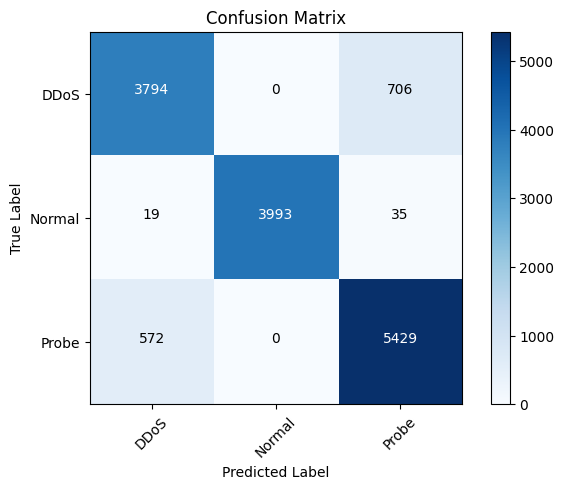

In [54]:
import itertools
def plot_confusion_matrix(conf_matrix, classes, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plot_confusion_matrix(confusion_mat, ['DDoS', 'Normal', 'Probe'], "Confusion Matrix")
plt.show()